# 1. Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 2. Definitions

## 2.1. Starting shapes

In [20]:
hilbert_mods = {
    'classic': np.array([
        [0, 0],
        [0, 1],
        [1, 1],
        [1, 0]
    ]),
    'pentagon': np.array([
        [0.2, 0],
        [0, 0.7],
        [0.5, 1],
        [1, 0.7],
        [0.8, 0]
    ]),
    'octagon': np.array([
        [0.2, 0],
        [0, 0.3],
        [0, 0.7],
        [0.2, 1],
        [0.8, 1],
        [1, 0.7],
        [1, 0.3],
        [0.8, 0]
    ]),
    'star': np.array([
        [0.2, 0. ],
        [0.3, 0.4],
        [0,  0.6],
        [0.4, 0.6],
        [0.5, 1],
        [0.6 ,0.6],
        [1, 0.6],
        [0.7, 0.4],
        [0.8, 0 ]]),
    'triangle': np.array([
        [0, 0],
        [0.5, 1],
        [1, 0]
    ]), 
    'hexagon': np.array([
        [0.2, 0],
        [0, 0.5],
        [0.2, 1],
        [0.8, 1],
        [1, 0.5],
        [0.8, 0]
    ])
}

## 2.2. Plot function

In [21]:
def plot(x, labels=0):
    plt.figure(figsize=(5,5))

    plt.plot(x[:, 0], x[:, 1], color='black')
    if labels:
        for i, (x_coord, y_coord) in enumerate(x):
            plt.text(x_coord, y_coord, str(i), color="red", fontsize=15, ha="center", va="center")
    if not labels:
        plt.axis('off')

    plt.axis('equal')
    plt.show()

## 2.3. Rotation

In [22]:
def rotate_left(x):
    # performs something like transposition of the curve
    # rotates the curve 90 degrees counterclockwise, flips its order and translates it to the origin
    x0 = x[-1] # point, which relative to others position will be preserved
    x = x @ np.array(
        [
            [0, 1],
            [-1, 0]
        ] # rotation matrix
    )
    x = np.flip(x, axis=0)
    d = -x[-1] + x0 # translation vector
    x += d
    return x

def rotate_right(x):
    # performs something like transposition of the curve along its antidiagonal
    # rotates the curve 90 degrees clockwise, flips its order and translates it to the origin
    x0 = x[0] # point, which relative to others position will be preserved
    x = x @ np.array(
        [
            [0, -1],
            [1, 0]
        ] # rotation matrix
    )
    x = np.flip(x, axis=0)
    d = -x[0] + x0 # translation vector
    x += d
    return x

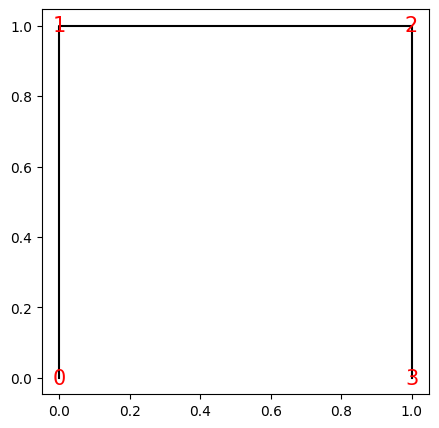

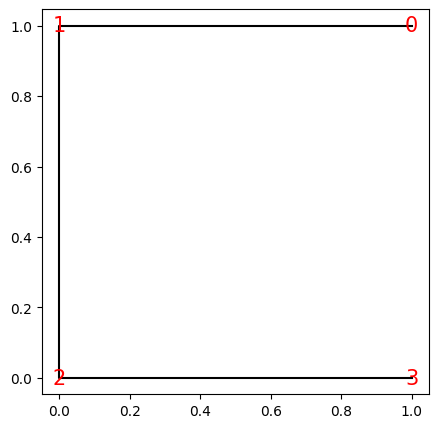

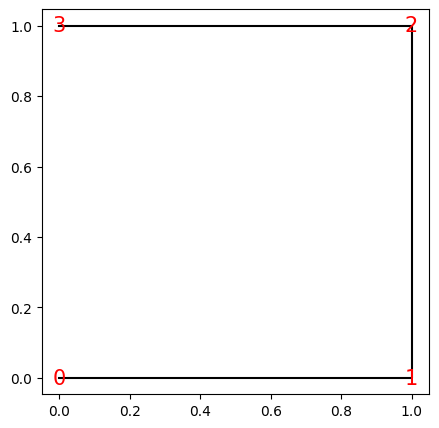

In [23]:
# how it works
plot(hilbert_mods['classic'], labels=1)
plot(rotate_left(hilbert_mods['classic']), labels=1)
plot(rotate_right(hilbert_mods['classic']), labels=1)

## 2.4. Generate curve

In [24]:
def hilbert(order=1, x0=0, y0=0, length=1/2, mod='classic'):
    if order == 1:
        # base case, starting shape shifted and scaled
        return hilbert_mods[mod] * length + np.array([x0, y0])
    # recursive case, divides the space into 4 parts
    # each of them is filled with a curve of order - 1
    p1 = hilbert(order - 1, length= length / 2, x0=x0, y0=y0, mod=mod)
    p2 = hilbert(order - 1,length= length / 2, x0=x0, y0=y0+length, mod=mod)
    p3 = hilbert(order - 1, length= length / 2, x0=x0+length, y0=y0+length, mod=mod)
    p4 = hilbert(order - 1, length= length / 2, x0=x0+length, y0=y0, mod=mod)
    # rotates the subcurves, so that they are connected
    p1 = rotate_right(p1)
    p4 = rotate_left(p4)
    return np.vstack([p1, p2, p3, p4])

def hilbert_3x3(order=1, x0=0, y0=0, length=1/2, mod='classic'):
    # instead of dividing the space into 4 parts, divides it into 9
    if order == 1:
        return hilbert_mods[mod] * length + np.array([x0, y0])
    n_length = length / 3
    n_order = order - 1
    p1 = hilbert_3x3(n_order, length= n_length, x0=x0, y0=y0, mod=mod)
    p2 = hilbert_3x3(n_order,length= n_length, x0=x0, y0=y0+2*n_length, mod=mod)
    p3 = hilbert_3x3(n_order, length= n_length, x0=x0, y0=y0+2*2*n_length, mod=mod)
    p4 = hilbert_3x3(n_order, length= n_length, x0=x0+2*n_length, y0=y0+2*2*n_length, mod=mod)
    p5 = hilbert_3x3(n_order, length= n_length, x0=x0+2*2*n_length, y0=y0+2*2*n_length, mod=mod)
    p6 = hilbert_3x3(n_order, length= n_length, x0=x0+2*2*n_length, y0=y0+2*n_length, mod=mod)
    p7 = hilbert_3x3(n_order, length= n_length, x0=x0+2*2*n_length, y0=y0, mod=mod)

    p1 = rotate_right(p1)
    p2 = rotate_right(p2)

    p6 = rotate_left(p6)
    p7 = rotate_left(p7)
    return np.vstack([p1, p2, p3, p4, p5, p6, p7])

# 3. Examples

## 3.1. Classic hilbert curve with different stariting shapes

mod: classic


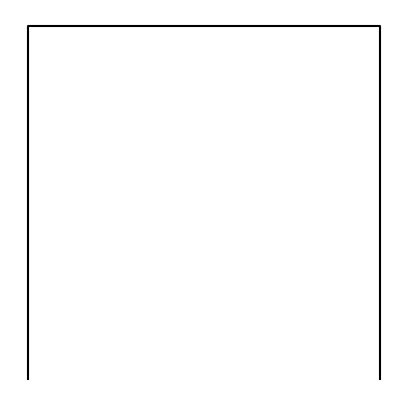

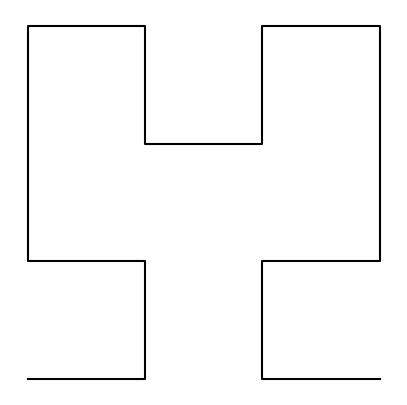

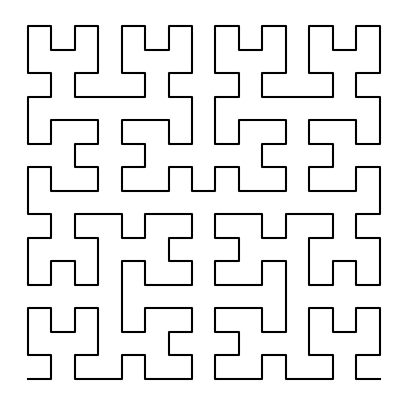

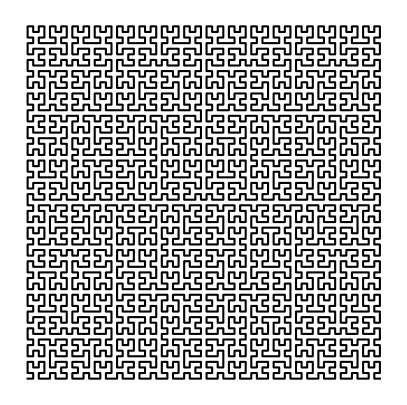

mod: pentagon


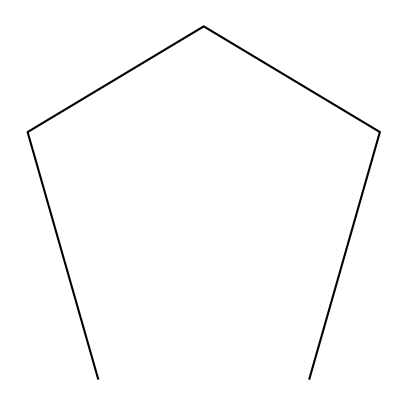

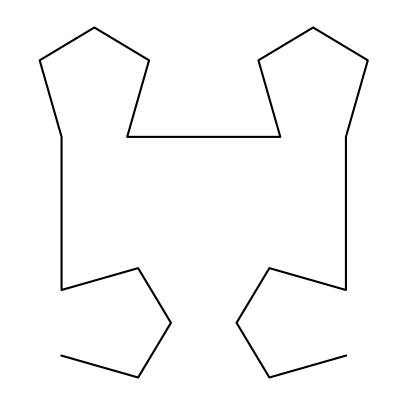

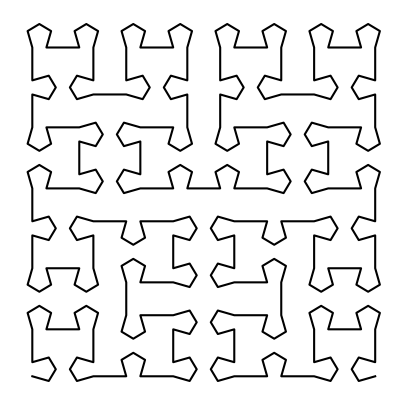

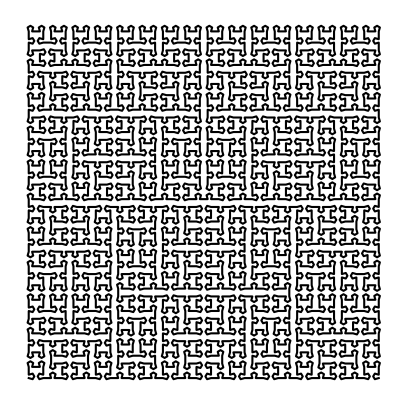

mod: octagon


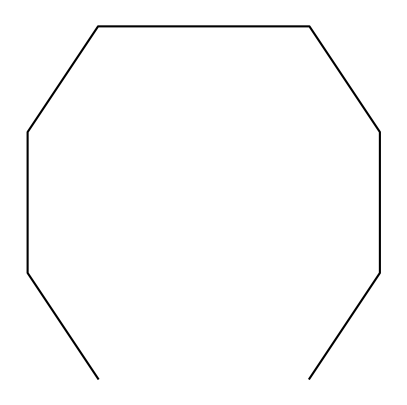

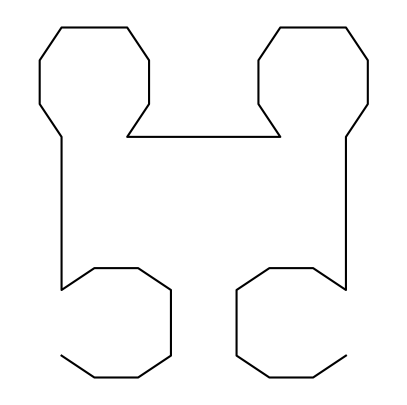

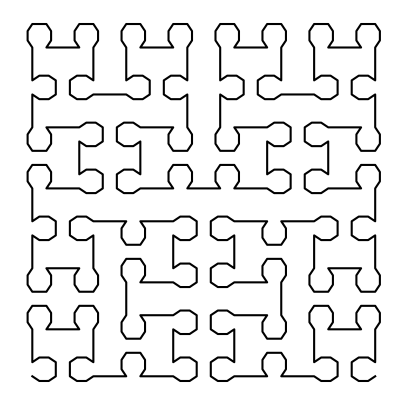

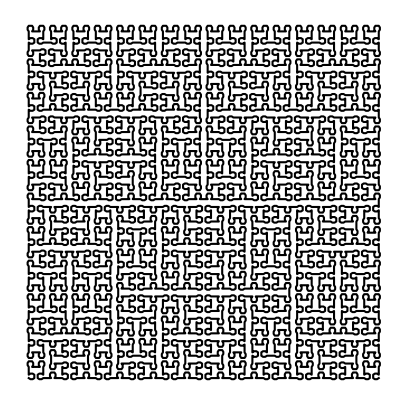

mod: star


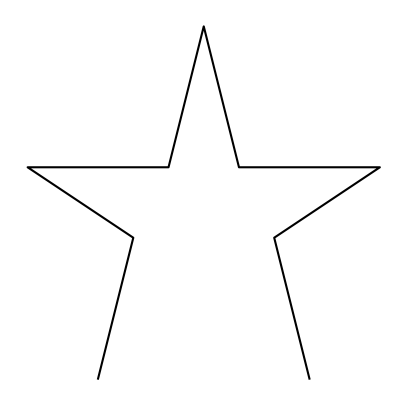

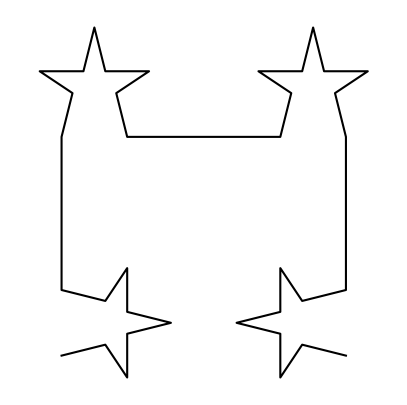

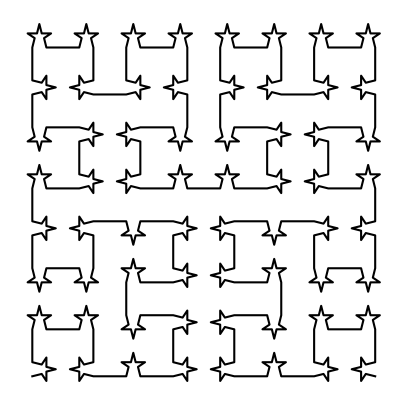

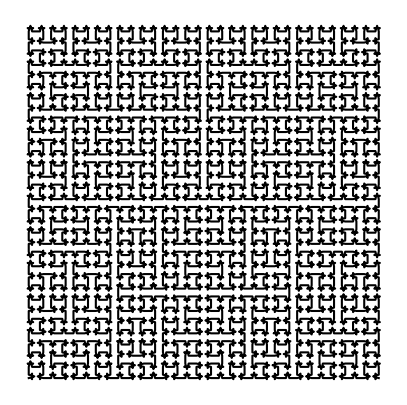

mod: triangle


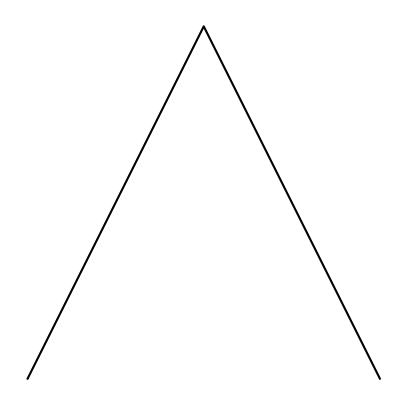

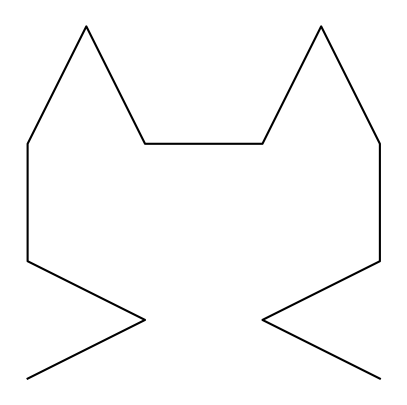

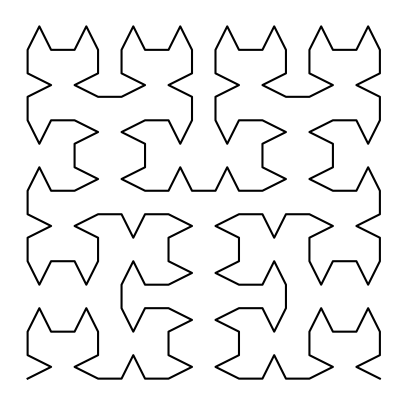

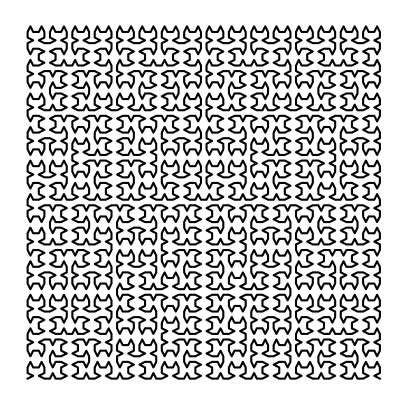

mod: hexagon


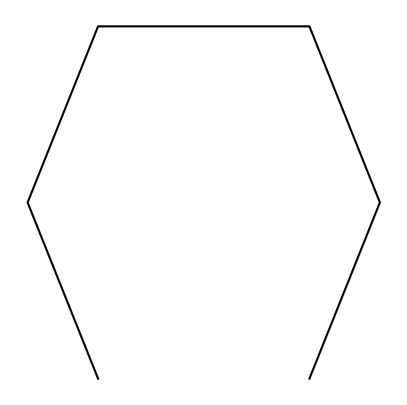

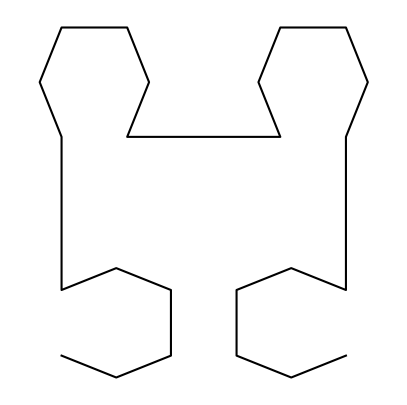

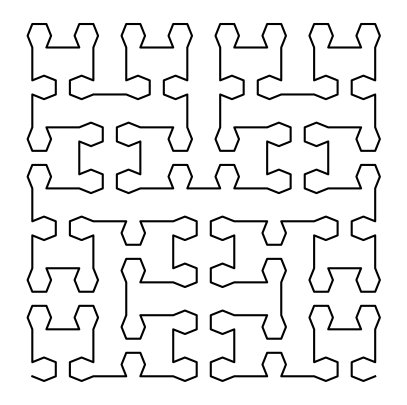

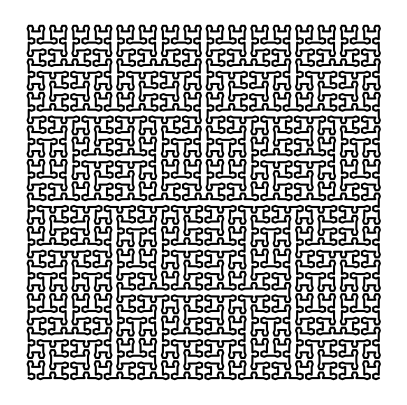

In [25]:
for mod in ['classic', 'pentagon', 'octagon', 'star', 'triangle', 'hexagon']:
    print(f'mod: {mod}')
    for i in [1, 2, 4, 6]:
        x = hilbert(i, mod=mod)
        plot(x, labels=0)

## 3.2. 3x3 hilbert curve

mod: classic


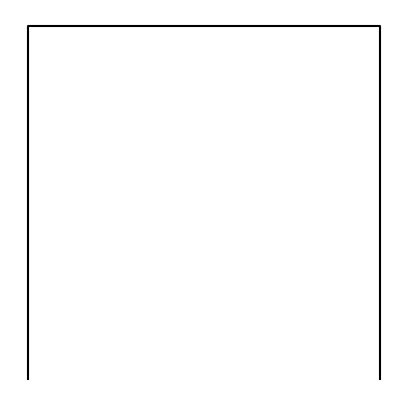

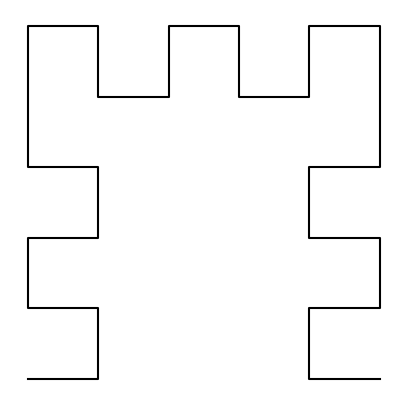

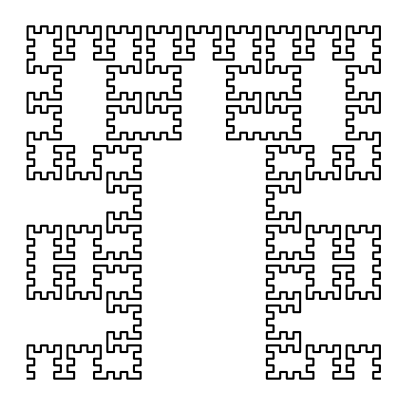

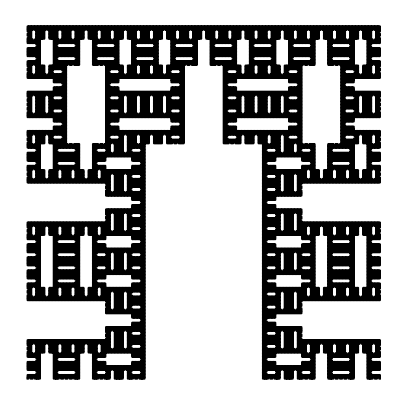

mod: pentagon


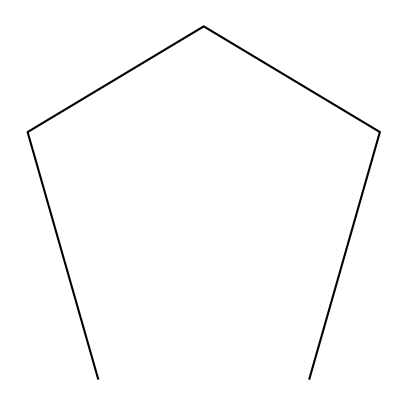

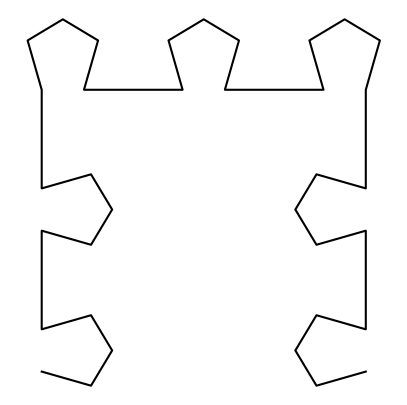

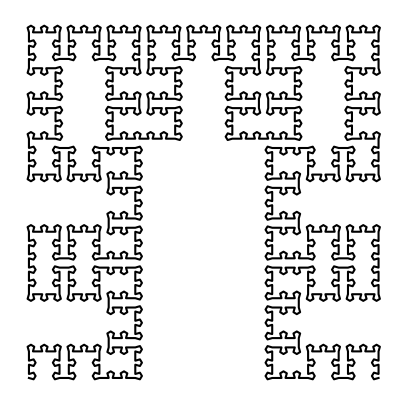

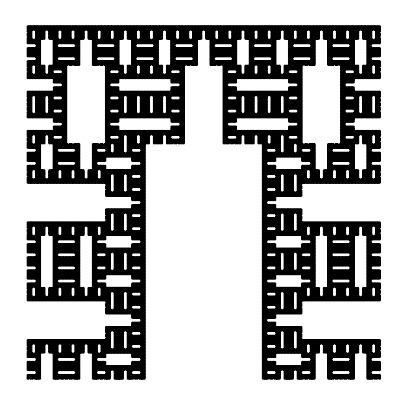

mod: octagon


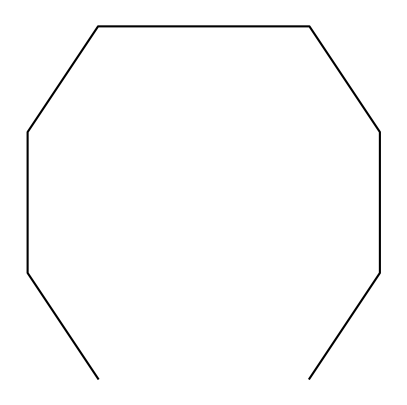

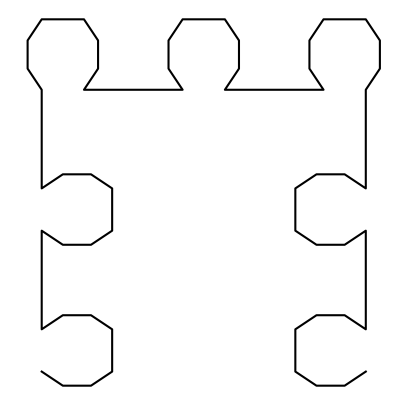

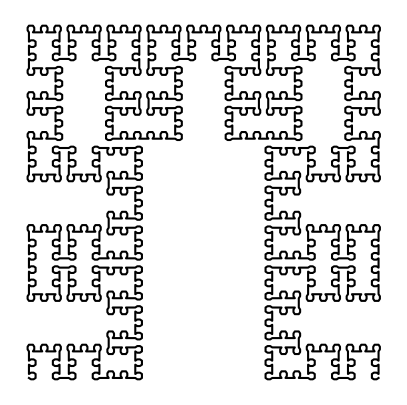

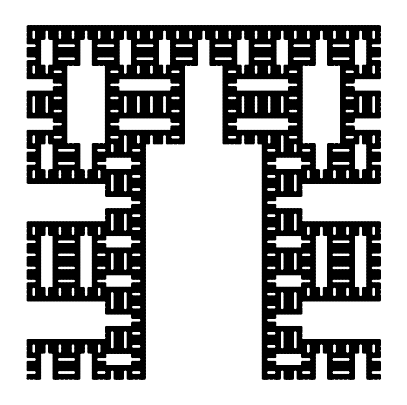

mod: star


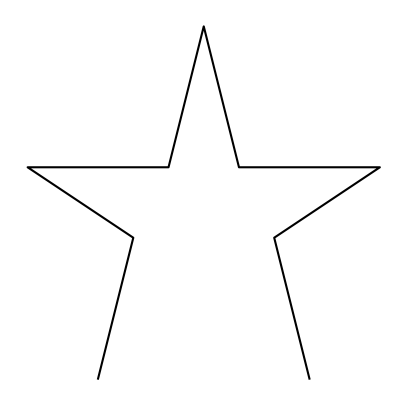

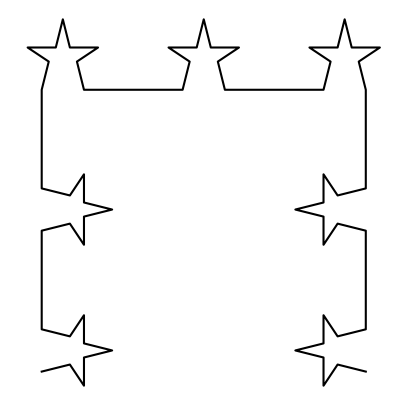

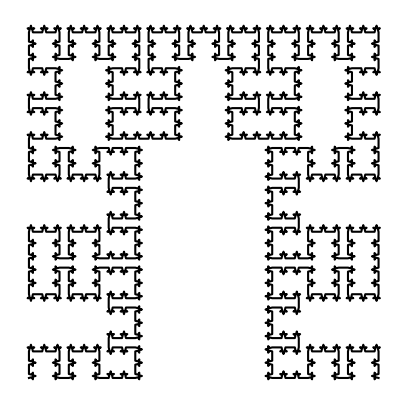

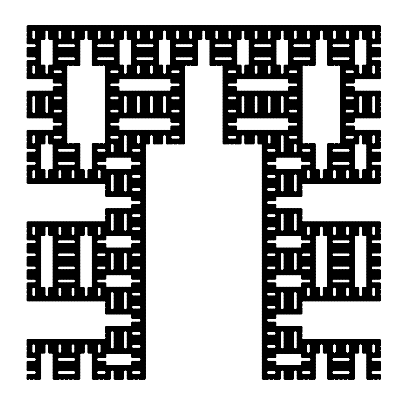

mod: triangle


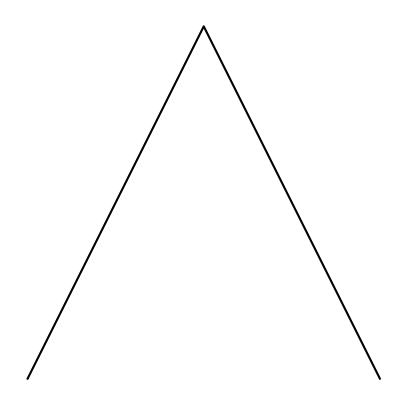

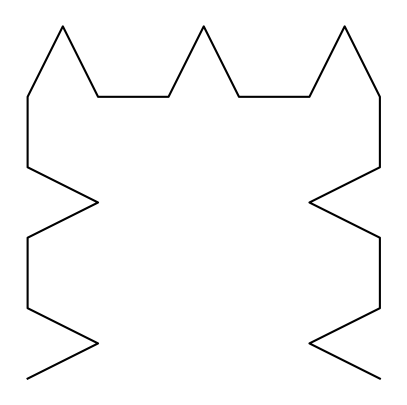

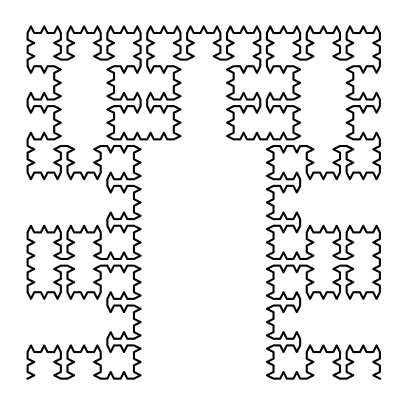

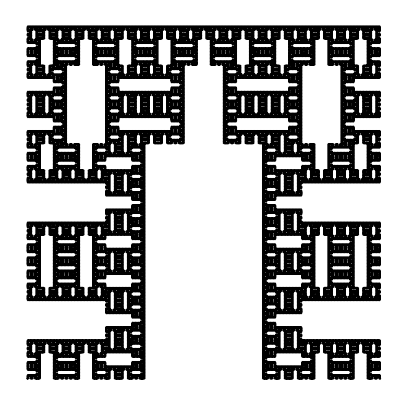

mod: hexagon


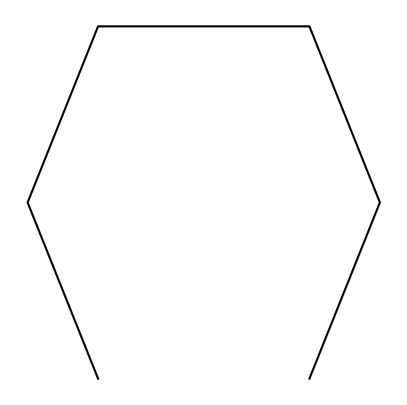

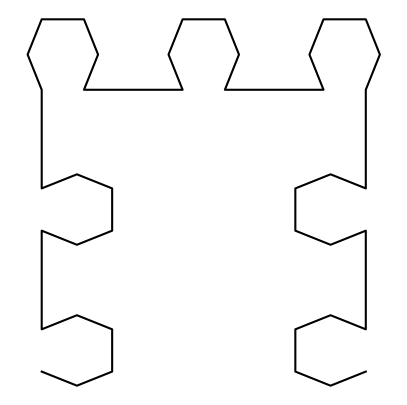

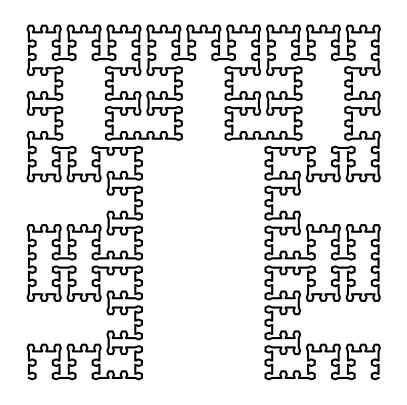

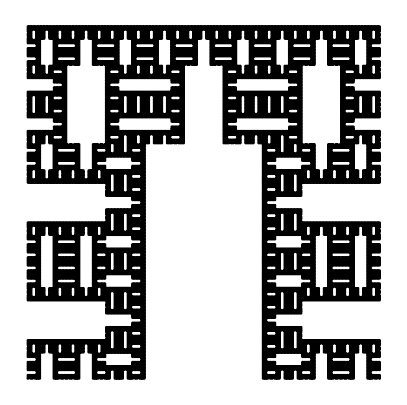

In [26]:
for mod in ['classic', 'pentagon', 'octagon', 'star', 'triangle', 'hexagon']:
    print(f'mod: {mod}')
    for i in [1, 2, 4, 6]:
        x = hilbert_3x3(i, mod=mod)
        plot(x, labels=0)

# 4. Report

## 4.1. Opis teoretyczny

### 4.1.1.  Historia
Krzywa Hilberta to przykład krzywej przestrzennie wypełniającej, opracowanej przez niemieckiego matematyka Davida Hilberta w 1891 roku. Jest ona inspirowana wcześniejszą pracą włoskiego matematyka Giuseppe Peano, który w 1890 roku zaprezentował pierwszą krzywą przestrzennie wypełniającą, dziś znaną jako krzywa Peano. Krzywa Hilberta stanowiła rozwinięcie i modyfikację pierwotnej idei Peano, przedstawiając bardziej uporządkowany i symetryczny wzór, który stał się popularnym przykładem konstrukcji fraktalnych.

### 4.1.2. Konstrukcja
Technicznie, opisywana poniżej konstrukcja dotyczy jedynie pseudo-krzywej Hilberta, skończonego rzędu $ n $ (czyli określonej liczby iteracji). Prawdziwa krzywa Hilberta powstaje dopiero w granicy, gdy  $n \to \infty$ . Tylko wtedy staje się ona w pełni krzywą przestrzennie wypełniającą, odwiedzającą każdy punkt kwadratu jednostkowego.
#### 4.1.2.1.  Rekurencja
Rekurencyjna konstrukcja krzywej Hilberta rzędu $n$ polega na dzieleniu przestrzeni (wyjściowo kwadratu jednostkowego) na cztery równe kwadraty oraz wypełnieniu ich krzywymi rzędu $n-1$. W dolnych kwadratach należy ponadto "przetransponować" krzywe - w lewym względem antydiagonali, zaś w prawym względem głównej diagonali. "Transpozycja" polega na obróceniu krzywej o $90^\circ$ w odpowiednią stronę, odwróceniu kolejności punktów oraz przesunięciu krzywej do wyjściowego obszaru. Obrót osiągnąć można mnożąc punkty przez [macierz obrotu](https://pl.wikipedia.org/wiki/Macierz_obrotu), zmiana kolejności to przepisanie tablicy od tyłu. W przypadku obrotu względem głównej diagonali łatwo dostępnym punktem pozostającym w tym samym relatywnym położeniu jest ostatni punkt (prawy dolny róg), zaś w drugim przypadku jest to pierwszy punkt (lewy dolny róg). Zapamiętując pozycję odpowiedniego z tych punktów i porównując z jego nową pozycją można otrzymać wektor przesunięcia potrzebny do umieszczenia krzywej w tym samym obszarze. <br>
Rekurencja kończy się, gdy rząd dojdzie do 1. Wówczas krzywa hilberta jest w kształcie kwadratowej, odwróconej liery "U".
#### 4.1.2.2. [L-system](https://en.wikipedia.org/wiki/L-system)

Są one używane do opisu wielu obiektów o samopowtarzalnej strukturze, w szczególności fraktali.

Krótko mówiąc, system L (lub L-system) składa się z:
- **alfabetu** — zmiennych, które są podstawiane zgodnie z regułami produkcji,
- **stałych** — stałych wartości,
- **aksjomatu** — punktu początkowego,
- **reguł produkcji** — określających, w jaki sposób zmienne są przekształcane (w co).

W szczególności dla krzywej Hilberta:
- **Alfabet**: A, B
- **Stałe**: F, +, −
- **Aksjomat**: A
- **Reguły produkcji**:
  - A → +BF−AFA−FB+
  - B → −AF+BFB+FA−

Jak to interpretujemy?
- „F” oznacza „rysuj do przodu”
- „-” oznacza „skręć w lewo o 90°”
- „+” oznacza „skręć w prawo o 90°”
- A, B podczas wizualizacji są ignorowane

### 4.1.3 Modyfikacje
Klasyczna postać krzywej Hilberta została zmodyfikowana na dwa sposoby:
- poza wyjściowym kształtem kwadratowym jest też trójkąt, gwiazda, pięciokąt, sześciokąt i ośmiokąt
- dzielenie przestrzeni na 4 części zamienić można na 9 części, wypełniając wszytskie poza środkową oraz dolnośrodkową

## 4.2 Analiza i wnioski
